Q3.1 Using MLP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers, models, applications

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split # For stratified subset

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Example: Create a 10,000 image stratified subset
x_train, _, y_train, _ = train_test_split(x_train_full, y_train_full,
                                        train_size=10000,
                                        stratify=y_train_full,
                                        random_state=42)
# If not using a subset, just use x_train_full and y_train_full
# x_train, y_train = x_train_full, y_train_full

In [5]:
x_train = x_train.astype("float32") / 255.0     #prepocessing the data to scale them to[0,1]
x_test = x_test.astype("float32") / 255.0

In [6]:
x_train_flat = x_train.reshape(-1, 28 * 28)     #reshaping the data from matrix to flat vector of 784 elements for LR &RF which is 1D
x_test_flat = x_test.reshape(-1, 28 * 28)

In [7]:
lr_model = LogisticRegression(max_iter=100, solver='saga', random_state=42)
lr_model.fit(x_train_flat, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train_flat, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Use 28x28 input, not flattened
    layers.Dense(30, activation='relu', name='layer_30'),
    layers.Dense(20, activation='relu', name='layer_20'),
    layers.Dense(10, activation='softmax', name='output')
], name="MLP_Model")

mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_30 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_20 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])      #for multi class classification with integer labels

history = mlp_model.fit(x_train, y_train,
                        epochs=20, # Train for a sufficient number of epochs
                        validation_data=(x_test, y_test))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5612 - loss: 1.3190 - val_accuracy: 0.8992 - val_loss: 0.3661
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8979 - loss: 0.3543 - val_accuracy: 0.9071 - val_loss: 0.3066
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9209 - loss: 0.2806 - val_accuracy: 0.9200 - val_loss: 0.2717
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9345 - loss: 0.2222 - val_accuracy: 0.9226 - val_loss: 0.2627
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9363 - loss: 0.2125 - val_accuracy: 0.9243 - val_loss: 0.2476
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9474 - loss: 0.1848 - val_accuracy: 0.9309 - val_loss: 0.2343
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9514 - loss: 0.1667 - val_accuracy: 0.9327 - val_loss: 0.2221
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9552 - loss: 0.1494 - val_accuracy: 0.

In [11]:
y_pred_lr = lr_model.predict(x_test_flat)
y_pred_rf = rf_model.predict(x_test_flat)
y_pred_mlp_probs = mlp_model.predict(x_test)
y_pred_mlp = np.argmax(y_pred_mlp_probs, axis=1)      #class with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

print("\n--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

print("\n--- MLP ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_mlp, average='weighted'):.4f}")

--- Logistic Regression ---
Accuracy: 0.9070
F1-Score (Weighted): 0.9066

--- Random Forest ---
Accuracy: 0.9518
F1-Score (Weighted): 0.9518

--- MLP ---
Accuracy: 0.9362
F1-Score (Weighted): 0.9360


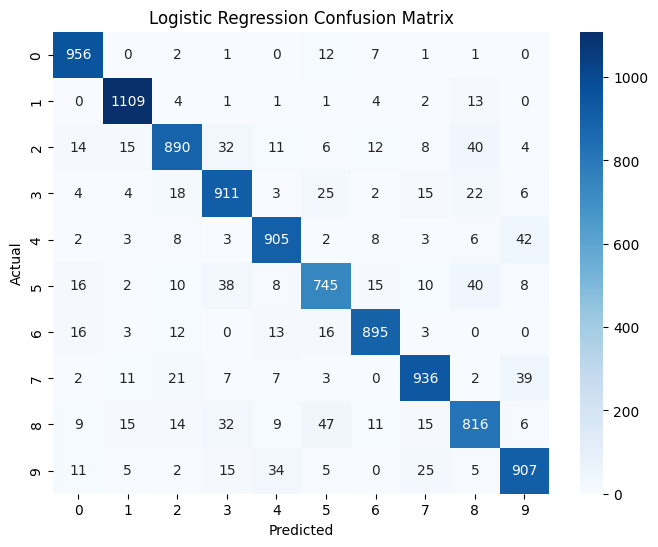

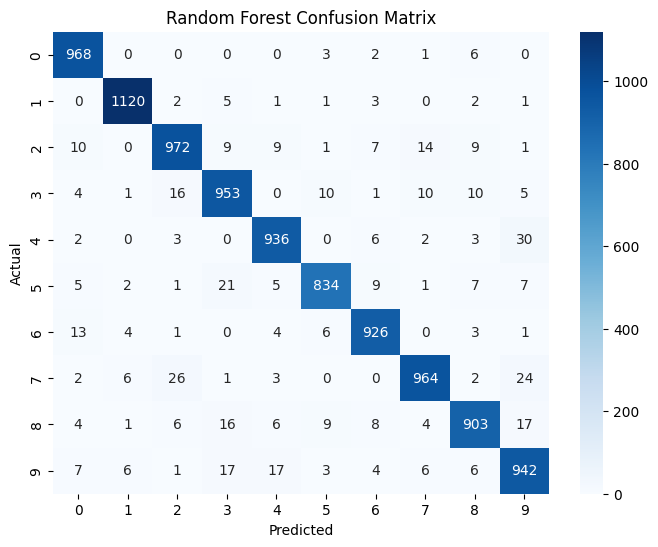

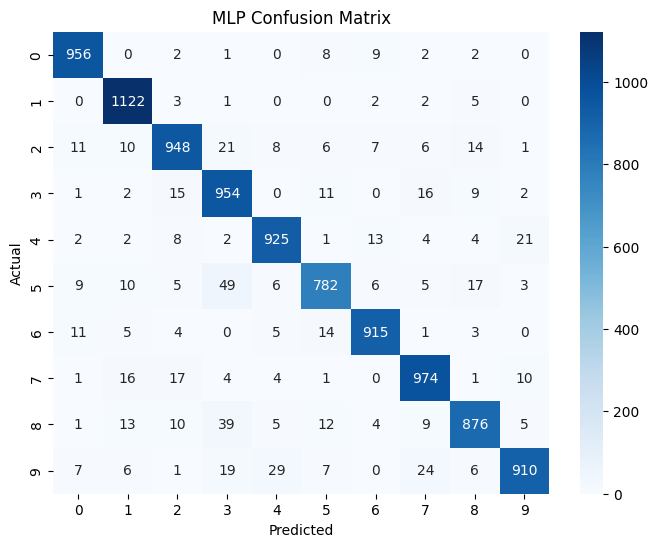

In [13]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")


plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")


plot_cm(y_test, y_pred_mlp, "MLP Confusion Matrix")

In [14]:
def plot_tsne(embeddings, labels, title):
    # Run t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30.0, n_iter=1000)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(10, 8))
    for i in range(10):
        indices = (labels == i)
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1],
                    label=str(i), s=10) # s=10 for smaller dots
    plt.legend(markerscale=3)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

In [15]:
untrained_mlp = models.Sequential([
    keras.Input(shape=(28, 28)), # Define input shape using keras.Input
    layers.Flatten(),
    layers.Dense(30, activation='relu'),
    layers.Dense(20, activation='relu', name='layer_20_untrained'),
    layers.Dense(10, activation='softmax')
])

# Create a new model that outputs the desired layer
embedding_model_untrained = models.Sequential(untrained_mlp.layers[:4]) # Take layers up to layer_20_untrained

embeddings_untrained = embedding_model_untrained.predict(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
# Create a new model that outputs the desired layer from the trained MLP
embedding_model_trained = models.Sequential(mlp_model.layers[:4]) # Take layers up to layer_20

embeddings_trained = embedding_model_trained.predict(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


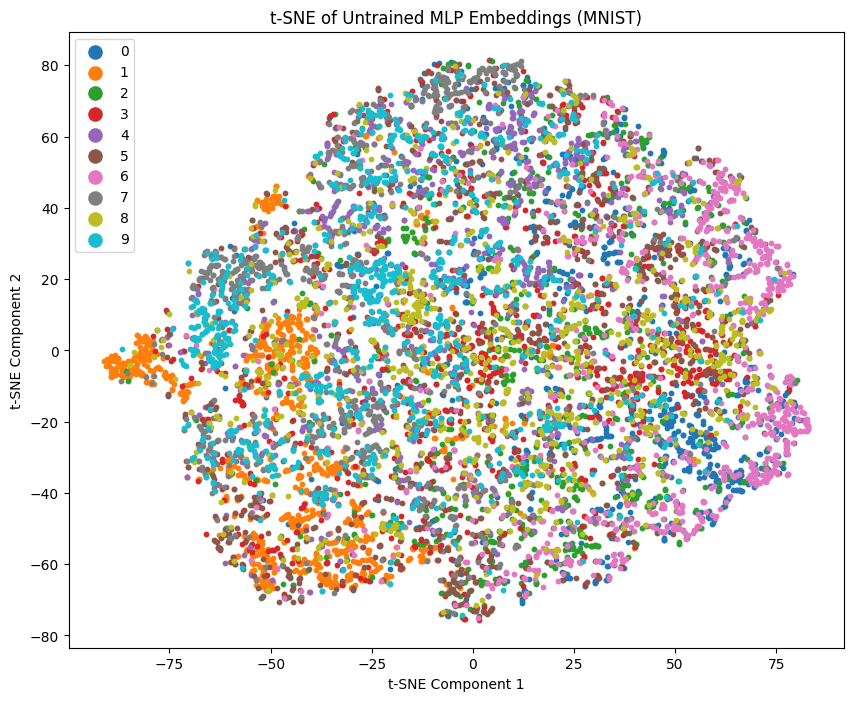

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


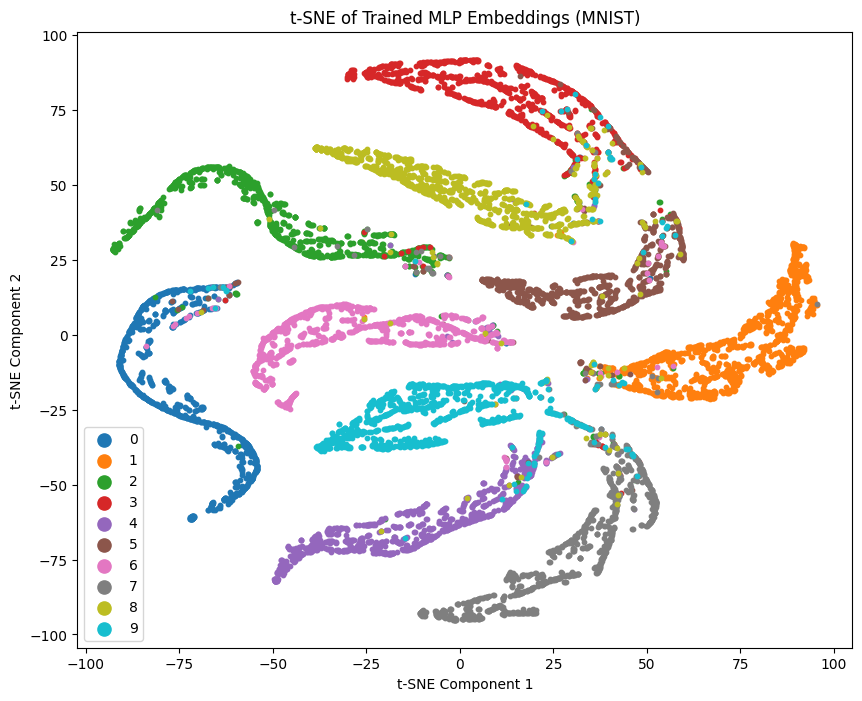

In [17]:
plot_tsne(embeddings_untrained, y_test, "t-SNE of Untrained MLP Embeddings (MNIST)")

plot_tsne(embeddings_trained, y_test, "t-SNE of Trained MLP Embeddings (MNIST)")

In [18]:
(x_train_f, y_train_f), (x_test_f, y_test_f) = keras.datasets.fashion_mnist.load_data()
x_test_f = x_test_f.astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
loss, accuracy = mlp_model.evaluate(x_test_f, y_test_f)
print(f"Accuracy of MNIST-trained MLP on Fashion-MNIST: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0541 - loss: 24.5465
Accuracy of MNIST-trained MLP on Fashion-MNIST: 0.0510


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


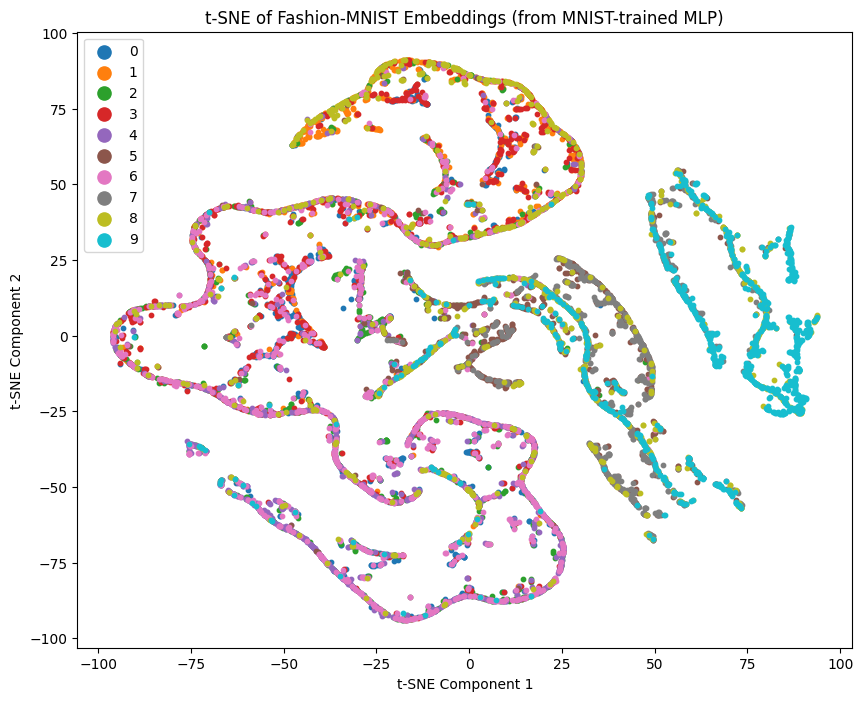

In [20]:
embeddings_fashion = embedding_model_trained.predict(x_test_f)
plot_tsne(embeddings_fashion, y_test_f, "t-SNE of Fashion-MNIST Embeddings (from MNIST-trained MLP)")

Q3.2 Using CNN

In [21]:
# Add a channel dimension: (N, 28, 28) -> (N, 28, 28, 1)
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

In [22]:
simple_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="Simple_CNN")

simple_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Simple_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
simple_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

simple_cnn.fit(x_train_cnn, y_train,
               epochs=10,
               validation_data=(x_test_cnn, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.7925 - loss: 0.6877 - val_accuracy: 0.9417 - val_loss: 0.2012
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9530 - loss: 0.1517 - val_accuracy: 0.9640 - val_loss: 0.1196
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9770 - loss: 0.0857 - val_accuracy: 0.9718 - val_loss: 0.0899
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9874 - loss: 0.0461 - val_accuracy: 0.9746 - val_loss: 0.0825
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9916 - loss: 0.0317 - val_accuracy: 0.9756 - val_loss: 0.0793
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9959 - loss: 0.0187 - val_accuracy: 0.9618 - val_loss: 0.1183
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9960 - loss: 0.0168 - val_accuracy: 0.9757 - val_loss: 0.0822
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9981 - loss: 0.0078 - va

In [24]:
def preprocess_for_pretrained(images, size=(32, 32)):
    # Convert grayscale (N, 28, 28, 1) to "RGB" (N, 28, 28, 3)
    images_rgb = np.repeat(images, 3, axis=-1)
    # Resize to the model's expected input size
    images_resized = tf.image.resize(images_rgb, size)
    return images_resized

# Let's use 75x75, a common size for models like MobileNet
IMG_SIZE = (75, 75)
x_train_pre = preprocess_for_pretrained(x_train_cnn, size=IMG_SIZE)
x_test_pre = preprocess_for_pretrained(x_test_cnn, size=IMG_SIZE)

In [25]:
base_model_1 = applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                      include_top=False,
                                      weights='imagenet')
base_model_1.trainable = False # Freeze the base

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = base_model_1(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x) # Add our own head
outputs = layers.Dense(10, activation='softmax')(x)

model_1 = models.Model(inputs, outputs, name="MobileNetV2")
model_1.summary()

/tmp/ipython-input-417661903.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_1 = applications.MobileNetV2(input_shape=IMG_SIZE + (3,),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [26]:
base_model_2 = applications.EfficientNetB0(input_shape=IMG_SIZE + (3,),
                                         include_top=False,
                                         weights='imagenet')
base_model_2.trainable = False # Freeze the base

inputs_2 = keras.Input(shape=IMG_SIZE + (3,))
x_2 = base_model_2(inputs_2, training=False)
x_2 = layers.GlobalAveragePooling2D()(x_2) # Add our own head
outputs_2 = layers.Dense(10, activation='softmax')(x_2)

model_2 = models.Model(inputs_2, outputs_2, name="EfficientNetB0")
model_2.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "EfficientNetB0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3, 3, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [27]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_1.fit(x_train_pre, y_train, epochs=5, validation_data=(x_test_pre, y_test))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_2.fit(x_train_pre, y_train, epochs=5, validation_data=(x_test_pre, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 340ms/step - accuracy: 0.5825 - loss: 1.3606 - val_accuracy: 0.8754 - val_loss: 0.4282
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 367ms/step - accuracy: 0.8852 - loss: 0.3956 - val_accuracy: 0.9201 - val_loss: 0.2855
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 470ms/step - accuracy: 0.9053 - loss: 0.3057 - val_accuracy: 0.9326 - val_loss: 0.2331
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step - accuracy: 0.9270 - loss: 0.2455 - val_accuracy: 0.9387 - val_loss: 0.2074
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 335ms/step - accuracy: 0.9342 - loss: 0.2196 - val_accuracy: 0.9262 - val_loss: 0.2297
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 251s 759ms/step - accuracy: 0.1041 - loss: 2.3327 - val_accuracy: 0.1135 - val_loss: 2.3408
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 176s 563ms/step - accuracy: 0.1015 - loss: 2.3315 - val_accuracy: 0.1010 - val_loss: 2.3076
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 228s 731ms/step - accuracy: 0.1212 - loss: 2

In [28]:
start_time = time.time()
simple_cnn.predict(x_test_cnn)
time_simple_cnn = time.time() - start_time

start_time = time.time()
model_1.predict(x_test_pre)
time_model_1 = time.time() - start_time

start_time = time.time()
model_2.predict(x_test_pre)
time_model_2 = time.time() - start_time

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 289ms/step


In [29]:
y_pred_simple_cnn = np.argmax(simple_cnn.predict(x_test_cnn), axis=1)
y_pred_model_1 = np.argmax(model_1.predict(x_test_pre), axis=1)
y_pred_model_2 = np.argmax(model_2.predict(x_test_pre), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 280ms/step


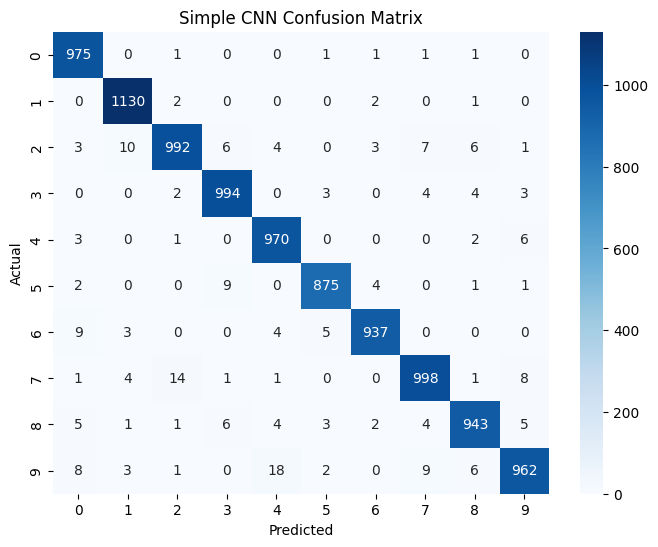

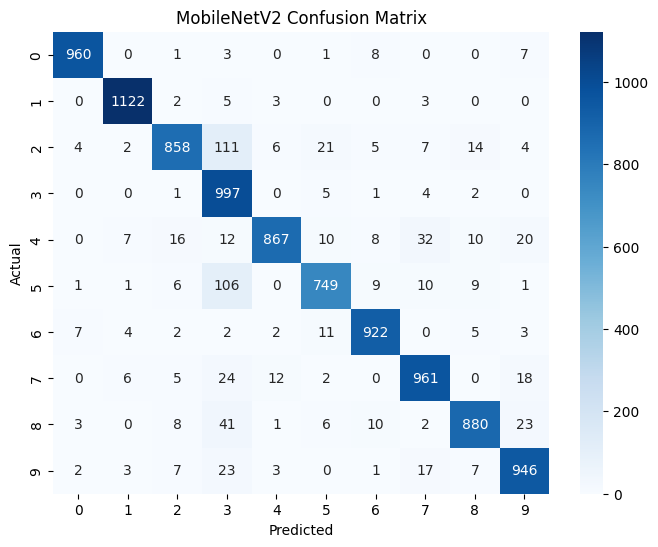

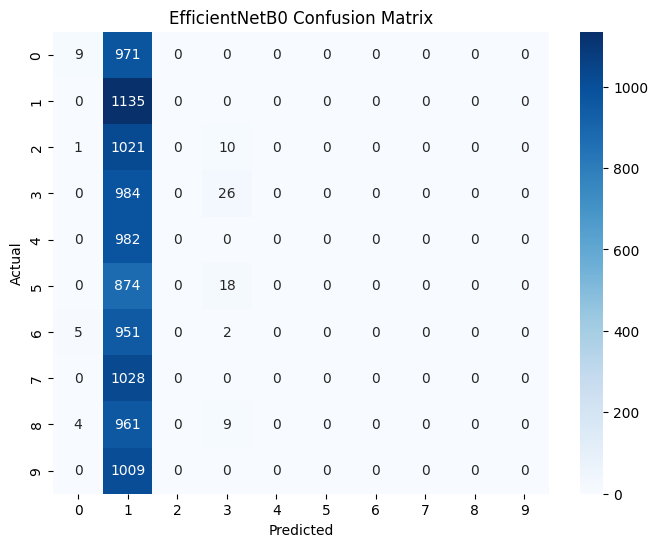

In [30]:
plot_cm(y_test, y_pred_simple_cnn, "Simple CNN Confusion Matrix")

plot_cm(y_test, y_pred_model_1, f"{model_1.name} Confusion Matrix")

plot_cm(y_test, y_pred_model_2, f"{model_2.name} Confusion Matrix")

In [31]:
print("\n--- Simple CNN Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple_cnn):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_simple_cnn, average='weighted'):.4f}")

print(f"\n--- {model_1.name} Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model_1):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_model_1, average='weighted'):.4f}")

print(f"\n--- {model_2.name} Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model_2):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred_model_2, average='weighted'):.4f}")


--- Simple CNN Metrics ---
Accuracy: 0.9776
F1-Score (Weighted): 0.9776

--- MobileNetV2 Metrics ---
Accuracy: 0.9262
F1-Score (Weighted): 0.9268

--- EfficientNetB0 Metrics ---
Accuracy: 0.1170
F1-Score (Weighted): 0.0300
